# Part 2 // Dim: MxM

In [1]:
import math
import numpy as np
import scipy.constants

In [2]:
coef_lambda = 5e-07
U_0 = 3e-20
n = 632


def read_data(path):
    with open(path, "br") as bf:
        data = np.fromfile(bf, np.float64)
    return data


def get_Pos_Vel(data, n, t):
    a = (t - 1)*(4*n + 1)
    b = t*(4*n + 1)
    
    x1 = []
    y1 = []
    
    V_x = []
    V_y = []
    
    i = 0
    for d in range(a,b - 1):
        if (b - a - i)%4 == 0:
            x1.append(data[d])
        elif (b - a - i + 1)%4 == 0:
            y1.append(data[d])
        elif (b - a - i + 2)%4 == 0:
            V_x.append(data[d])
        else:
            V_y.append(data[d])
        i = i + 1
    
    return [x1, y1, V_x, V_y]

In [3]:
import random

const_boltzmann = scipy.constants.k
temperature = 302 # 302 K or 30 C
const_alfa = random.random()

print("Const Boltzmann: ", const_boltzmann)
print("Temperature: ", temperature)
print("Const alfa: ", const_alfa)
print("Product of constants: ", const_alfa * temperature * const_boltzmann)
const = const_alfa * temperature * const_boltzmann

Const Boltzmann:  1.38064852e-23
Temperature:  302
Const alfa:  0.8830526340275147
Product of constants:  3.6819396430016125e-21


### Potential: 

In [4]:
def coordinates_k(r, L, size):
    return int(r/ (L*math.sqrt(2) )* size) 

In [5]:
def SumLabmdaWithVelocity(Vb, Va, a, coef_lambda):
    summ = 0.00
    
    for i in range(1,a+1):
        for k in range(1,a+1):
            summ = summ + i*coef_lambda*Va - k*coef_lambda*Vb
    return summ
    

def grad_of_modification_system(path, t, size):    
    shape = (size, size)
    poten_matrix = np.zeros(shape)
       
    for alfa in range(0, n):
        for beta in range(0, alfa):
            a = alfa
            b = beta

            x_cord = coordinates_k(math.sqrt(x[alfa]**2 + y[alfa]**2), L, size)
            y_cord = coordinates_k(math.sqrt(x[beta]**2 + y[beta]**2), L, size)

            # for original model
            yi = y[a] - y[b] + SumLabmdaWithVelocity(v_y[a], v_y[b], count, coef_lambda)
            xi = x[a] - x[b] + SumLabmdaWithVelocity(v_x[a], v_x[b], count, coef_lambda)

            abs_r = math.sqrt(xi**2 + yi**2)
            exp_r = math.exp(- abs_r / coef_lambda)

            grad_x_r = U_0 / (n**2) * ( - exp_r / abs_r ) * (coef_lambda + abs_r**2) / abs_r**4 * xi
            grad_y_r = U_0 / (n**2) * ( - exp_r / abs_r ) * (coef_lambda + abs_r**2) / abs_r**4 * yi

            poten_matrix[x_cord][y_cord] = poten_matrix[x_cord][y_cord] + math.sqrt(grad_x_r**2 + grad_y_r**2)


        for beta in range(alfa + 1, n):
                a = alfa
                b = beta

                x_cord = coordinates_k(math.sqrt(x[alfa]**2 + y[alfa]**2), L, size)
                y_cord = coordinates_k(math.sqrt(x[beta]**2 + y[beta]**2), L, size)

                grad_x_r = 0
                grad_y_r = 0 

                # for original model
                yi = y[a] - y[b] + SumLabmdaWithVelocity(v_y[a], v_y[b], count, coef_lambda)
                xi = x[a] - x[b] + SumLabmdaWithVelocity(v_x[a], v_x[b], count, coef_lambda)


                abs_r = math.sqrt(xi**2 + yi**2)
                exp_r = math.exp(- abs_r / coef_lambda)

                grad_x_r = U_0 / (n**2) * ( - exp_r / abs_r ) * (coef_lambda + abs_r**2) / abs_r**4 * xi
                grad_y_r = U_0 / (n**2) * ( - exp_r / abs_r ) * (coef_lambda + abs_r**2) / abs_r**4 * yi

                poten_matrix[x_cord][y_cord] = poten_matrix[x_cord][y_cord] + math.sqrt(grad_x_r**2 + grad_y_r**2)
                #if beta % 100 == 0: print("+ ", end="")

    print("Uraaa! Finish! ")
    return poten_matrix

In [7]:
time = [10, 20, 30, 40, 50, 60, 70, 80, 90]

In [8]:
path = "Result/task2/spr_simulation_N_632_phi_0.17_a_5_U0_3e-20_k_0.bin"
L = 8.78082e-05
count = 5
size = 100
t = 100

shape = (size, size)
potential = np.zeros(shape)
    
    
for itera in range(0, len(time)):
    t = time[itera]
    x, y, v_x, v_y = get_Pos_Vel(read_data(path), n, t)

    potential = potential + grad_of_modification_system(path, t, size)

potential = potential / len(time)

Uraaa! Finish! 
Uraaa! Finish! 
Uraaa! Finish! 
Uraaa! Finish! 
Uraaa! Finish! 
Uraaa! Finish! 
Uraaa! Finish! 
Uraaa! Finish! 
Uraaa! Finish! 


In [9]:
print("Our_matrix: \n\n")
for i in range(0, size):
    for j in range(0, size):
        print(" ", potential[i][j], end="")
    print("\n")

Our_matrix: 


  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

  0.0  1.541187543796542e-08  8.55150708402547e-11  5.561148901044716e-13  1.7682887844932977e-15  4.152409843613535e-16  3.08692796917315e-17  2.1411301333974138e-18  1.3890821828416405e-19  8.038179963265434e-21  1.1393512309093321e-22  3.3346151189271315e-23  2.4812575781224436e-24  1.8876982907621348e-25  1.0875426279261194e-26  6.683863842911924e-28  5.349222840600674e-29  4.30815752270921e-30  1.5399606681423895e-31  1.0609903210759785e-32  1.2983340722704091e-33  3.756076

  0.0  2.141130133397414e-18  1.4847799309555154e-16  7.202182418018741e-16  2.0563629879381753e-14  2.7881973810646e-11  5.088636381206632e-10  1.8500613122653377e-09  3.208170046535914e-08  8.941565455175087e-12  9.210248173579072e-14  6.549097909138976e-15  2.270259352552584e-16  1.805343808635167e-17  9.284804809191247e-19  5.730246306962955e-20  2.791948813487697e-21  1.853604070785618e-22  7.891555049570786e-24  6.693361785873363e-25  4.3708613192198555e-26  1.768097596314186e-27  1.8875754311902272e-28  1.18012253402535e-29  1.0637356065066638e-30  6.967576126094253e-32  5.173726819318861e-33  4.1078824429540126e-34  2.7973130405967666e-35  1.7512188627436575e-36  6.825747460100561e-38  4.587019737385406e-39  3.3284620264347767e-40  2.337879770149222e-41  1.88774219601994e-42  1.5294243123100579e-43  8.804009520677861e-45  7.30579464044572e-46  6.656039613130906e-47  4.798532539871995e-48  5.540082294139406e-49  3.932815688650688e-50  2.205199667218897e-51  2.1401999658403657e-5

  0.0  1.0875426279261194e-26  4.982446952959019e-25  5.590959311136353e-24  1.4222353379505748e-23  2.731801462057433e-21  2.6317910562117222e-20  9.284804809191245e-19  1.4808967965299462e-17  2.8889533355135794e-16  1.5757693576148184e-14  7.90676373819826e-13  6.649305852041832e-11  6.012550712595603e-09  6.245384850420269e-08  8.918756154436072e-09  6.821836398901495e-11  1.726659960486151e-12  3.412124003434563e-14  1.0320601131071267e-15  3.9359642904694596e-17  1.5828166984549703e-18  1.089734560028548e-19  6.388488371020139e-21  4.1428256738162903e-22  1.9501969411379496e-23  1.7157151797453582e-24  1.1202858923441033e-25  7.740384112053945e-27  3.9497576045092754e-28  1.7193512337151417e-29  1.2882398891504678e-30  7.79597281938322e-32  6.662195419101057e-33  4.9250763994499646e-34  2.4292363049839736e-35  1.7701110512772018e-36  1.5748465138432748e-37  1.0836169872313301e-38  9.467030431699588e-40  7.720746993589977e-41  6.36753073226759e-42  4.441610315385639e-43  2.7402203

  0.0  1.0609903210759784e-32  6.847059183690869e-31  6.333693367402497e-30  5.685291344824938e-29  3.606702696186761e-27  2.4578134220264356e-26  6.693361785873363e-25  7.119778538945016e-24  7.174728885108056e-23  9.170680118220157e-22  6.175419848940656e-20  2.8733394541783194e-18  2.719944199574482e-17  1.032060113107127e-15  6.09023913940918e-14  1.2047983686049657e-12  9.982402208887198e-11  1.2142780526878585e-08  1.1879558973465783e-07  6.006643278723022e-08  9.272359595561505e-11  1.0720704442160609e-12  4.001287315944674e-14  1.170868582539083e-15  4.7077228093902905e-17  2.8427407321724192e-18  1.643656846819913e-19  1.030110199655941e-20  3.11077113933923e-22  1.7215879888270258e-23  1.1366291734338365e-24  6.684650480281551e-26  6.903502738740572e-27  3.1772860684625777e-28  2.422307328203935e-29  1.5120416301655163e-30  9.831673050660958e-32  7.267931123484223e-33  4.048438238838113e-34  4.532621545245848e-35  3.3466736530322e-36  2.7042343811319134e-37  2.030183116134227

  0.0  1.8001520250487825e-42  4.4066113838414893e-41  3.1520458684009807e-40  2.51716879865137e-39  2.21000717660325e-37  1.5620922946078894e-36  2.7973130405967666e-35  2.9074861341107084e-34  3.854917101308104e-33  7.640582212912874e-32  1.902005629112544e-30  4.099087345753354e-29  5.089129889924662e-28  7.740384112053945e-27  1.8264015511422413e-25  2.0106623362644418e-24  5.2375907738922275e-23  7.486724619644148e-22  1.0301101996559409e-20  2.841900936631488e-19  3.686831093272201e-18  8.80985049653733e-17  2.7348283499721262e-15  9.874054357072287e-14  5.239460840504552e-12  3.850871503056223e-10  7.220634291583599e-08  4.267932734711825e-07  5.156440674205451e-08  2.1214582306161716e-10  3.0344933494490176e-12  6.183667300782292e-14  3.4755836975461942e-15  8.029483120806883e-17  2.709025075062938e-18  1.6936695513683949e-19  9.08516595508826e-21  6.3100441769306175e-22  3.337256439356221e-23  3.2524377754815e-24  2.471759124200514e-25  1.6319496972130673e-26  7.88357852153753

  0.0  6.163579069614843e-52  1.738231351159819e-50  1.2002249499895007e-49  1.8294700869581485e-48  7.461276394187142e-47  5.900706528165061e-46  8.804009520677861e-45  1.0423952846542045e-43  1.2029638905049389e-42  1.8279670777464542e-41  4.301347812799466e-40  8.509256115166626e-39  1.0118963496523867e-37  1.770111051277202e-36  3.7643888528461404e-35  4.7928046505195614e-34  8.826982396581582e-33  8.989652007678883e-32  1.5120416301655163e-30  2.482986381835426e-29  2.70873268507639e-28  5.7956547939890856e-27  8.549092483955234e-26  1.9854236592374746e-24  2.3880920401720664e-23  5.228479777273354e-22  7.963233781560772e-21  1.693669551368395e-19  2.622128030103343e-18  4.252393547326108e-17  1.5129119092342336e-15  2.4029673935576092e-14  7.650059701619594e-13  9.523802008661464e-11  6.9465789127050275e-09  1.23622473406126e-07  6.175137329987632e-08  1.4589537809044115e-10  8.021599131324273e-13  2.2922249274621885e-14  1.2725154000754374e-15  4.8283757070862657e-17  2.59810554

  0.0  8.962252523587127e-61  2.8616045566877814e-59  2.2806798671383434e-58  2.4936624387786445e-57  1.2495484205544593e-55  6.5460387513832e-55  1.2475742603028597e-53  1.3463085807198304e-52  2.1174473277383857e-51  3.9669034793320527e-50  5.489129864133052e-49  1.0973784254920166e-47  1.2554572389276245e-46  1.8306281515119646e-45  4.103784276077765e-44  3.5825065060332782e-43  7.156449213619873e-42  8.385820933790412e-41  1.283608405489123e-39  1.8074085521507683e-38  2.6554564961835463e-37  3.623406118268022e-36  4.347681047225386e-35  9.857346719454983e-34  1.1581385313577754e-32  2.075001430911878e-31  2.5729755100283158e-30  4.1186606982871677e-29  4.279853575896041e-28  5.655258346691386e-27  1.05506317792942e-25  1.9753712561101315e-24  2.9972751132192535e-23  1.8826576200303985e-22  7.565150749603546e-21  8.855918728264392e-20  3.850086423081816e-18  8.059886230111477e-17  1.8137398759298037e-15  4.34832791350704e-14  4.502576045307558e-12  3.008280949081577e-10  2.08878198

  0.0  3.999884903473009e-68  6.731413862292416e-67  5.612339402234072e-66  1.8249328307004852e-64  2.492850780651659e-63  3.8151060674731116e-62  4.685264561293462e-61  1.130488024790052e-59  1.3610522832706273e-58  7.070263950740016e-58  1.7885948120733785e-56  3.788774277958172e-55  2.447265295894597e-54  1.0759338095038304e-52  1.6790957159586125e-51  2.064532339583133e-50  1.4022159511910915e-49  1.7459449621872135e-48  3.601326725286875e-47  3.017547311022673e-46  5.936952522035978e-45  1.5731732590663652e-43  1.237627564576657e-42  1.9261950091577076e-41  5.01032929062916e-40  4.4236885745190706e-39  4.418219619019079e-38  5.400607208534497e-37  5.7673877650194925e-36  5.283230088322461e-35  2.12096139061771e-33  1.9002980300357407e-32  2.1868006763209896e-31  4.073606667958053e-30  1.0938509964513002e-28  4.653069891495165e-28  6.96466368994693e-26  4.1595677626869e-25  3.722684218042003e-24  1.5546171934088594e-22  9.724125663340672e-22  1.4966422110581854e-20  1.5170341213514

  0.0  1.8481476323818384e-77  5.715247298973208e-76  4.036305135854027e-75  3.851992710019741e-74  2.2947070561010856e-72  1.4701291222231433e-71  1.9830733339962567e-70  2.2601344897493092e-69  3.050828861079137e-68  4.4386694875959086e-67  1.2370597393275007e-65  1.3575323246540152e-64  1.5026446043980472e-63  2.765149463190024e-62  5.681494754943665e-61  4.939981670896047e-60  8.972997910319611e-59  1.034477954094487e-57  1.0599575849716639e-56  1.4524510508176342e-55  2.1660826854122705e-54  2.4245686707611617e-53  3.2251141340419158e-52  5.392586410640643e-51  6.300138331884657e-50  1.2451229001778295e-48  1.0924973043236451e-47  1.989473707160613e-46  1.6270929744706606e-45  1.725906803672721e-44  2.4083292050401057e-43  4.708270793118315e-42  7.187882375161793e-41  5.424073546007426e-40  1.2673038875693086e-38  1.2475655880052924e-37  2.342484600930172e-36  4.828459417942462e-35  4.9336002661083975e-34  8.842852895396882e-33  1.6381499475437643e-31  1.72656741228845e-30  3.4540

  0.0  5.827425482407916e-86  4.441276060301237e-84  1.0480570130366346e-82  7.248102644893379e-82  5.5490301539312895e-80  9.126508838021293e-80  3.0559568230410746e-78  1.5495830363617682e-77  7.542517840768417e-76  1.9563117238053693e-74  6.839259817459834e-74  1.6446802116192097e-72  2.136423243907955e-71  1.4462249634644227e-70  7.182866778243772e-69  2.975392195923619e-68  1.2744830131910487e-66  7.846373472417838e-66  8.726102766110229e-65  7.648558393266003e-64  2.6286611274048907e-62  3.872276107033749e-61  2.021331354368234e-60  6.523440287385864e-59  5.493221280247163e-58  1.192430371660976e-56  2.018905812165924e-55  1.581431391118311e-54  1.0453814510826852e-53  5.481741633735339e-53  2.7327163881040213e-51  1.0599333118726904e-49  6.2724054165976e-49  2.7337336003229554e-48  5.8171759575605915e-47  1.329553324233907e-45  6.936941021169009e-45  1.951481223762019e-43  2.6145568173415863e-42  4.115724689797385e-41  8.76038501651323e-40  9.342882277257247e-39  3.6547752380878

  0.0  9.33416016935395e-95  9.68819581073252e-94  1.7902187006533565e-92  1.425239700184301e-91  9.777247985138065e-90  4.187048101832856e-89  5.106668342371666e-88  5.6344129056571875e-87  1.132109984667604e-85  1.50254662704457e-84  1.3749533628747295e-83  3.695307535839525e-82  5.055292473769513e-81  4.39756437528231e-80  1.882831585531201e-78  1.1730567511777961e-77  2.564398764213306e-76  2.363070011973775e-75  2.041688406700034e-74  3.4940402885616785e-73  5.934681421757426e-72  4.12994453242329e-71  6.304026404304616e-70  9.127145802181817e-69  1.5837182180299073e-67  2.9891417201143494e-66  2.635053137803649e-65  1.8474316895199102e-64  1.5236185345151733e-63  2.0908040012065077e-62  3.077704548077782e-61  8.015906400481737e-60  1.3542848211425684e-58  2.7920351016236403e-58  1.0453944460722928e-56  1.309135062026667e-55  2.4873058982610666e-54  2.1674412329985414e-53  9.211914461222757e-52  8.594532765816934e-51  1.0593495819915902e-49  9.912836525624546e-49  2.59639750048190

  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

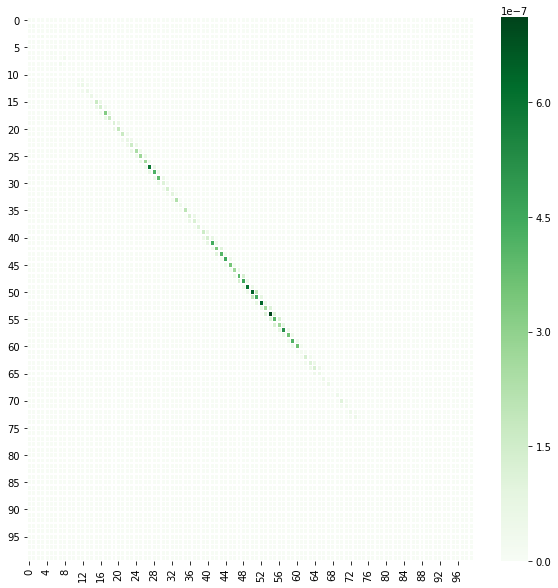

In [31]:
ax = sns.heatmap(potential , linewidth=0.5, cmap="Greens")

plt.gcf().set_size_inches(10,10)
plt.show()

# G_target

In [11]:
def coordinates_k(r, L, size):
    return int(r/ (L)* size)

In [14]:
shape = (size, size)
res_target = np.zeros(shape) 

for itera in range(0, len(time)):
    t = time[itera]
    x, y, v_x, v_y = get_Pos_Vel(read_data(path), n, t)

    for i in range(0, n):
        for j in range(0, n):
            yi = y[i] - y[j] + SumLabmdaWithVelocity(v_y[j], v_y[i], count, coef_lambda)
            xi = x[i] - x[j] + SumLabmdaWithVelocity(v_x[j], v_x[i], count, coef_lambda)

            k = coordinates_k(xi, L, size)
            m = coordinates_k(yi, L, size)
            res_target[k][m] = res_target[k][m] + 1

    print("Progress: <TIME> ", t, " from ", n)
    
res_target = res_target / len(time)
print("\nFinish!\n")

Progress: <TIME>  10  from  632
Progress: <TIME>  20  from  632
Progress: <TIME>  30  from  632
Progress: <TIME>  40  from  632
Progress: <TIME>  50  from  632
Progress: <TIME>  60  from  632
Progress: <TIME>  70  from  632
Progress: <TIME>  80  from  632
Progress: <TIME>  90  from  632

Finish!



In [15]:
V = L*L
const_a = V*(n-1)/n

res_target = res_target * const_a
print("Matrix q_t")

for i in range(0, size):
    for j in range(0, size):
        if res_target[i][j] != 0:
            res_target[i][j] = math.log10(res_target[i][j])

Matrix q_t


In [16]:
for i in range(0, size):
    for j in range(0, size):
        print(" ", res_target[i][j], end="")
    print("\n")

  -5.128840302939625  -5.768570745300611  -5.81817265158299  -5.897598363993334  -5.910403311254066  -5.969909008394142  -5.993775390360048  -6.009434054931286  -6.056289635791013  -6.01864205671811  -6.018254466793318  -6.033632818617741  -6.047913397709449  -6.043785092080865  -6.079747239119939  -6.062250634028011  -6.084233792263757  -6.0541803820970985  -6.10265837836238  -6.088311704684196  -6.10691388365446  -6.10691388365446  -6.1653133000743  -6.162064199020423  -6.1642275633040535  -6.161525037583201  -6.141003370438599  -6.152460244176021  -6.168039576961195  -6.164770092396348  -6.139976669057584  -6.133361628144724  -6.109774230867206  -6.133361628144724  -6.159375060509642  -6.15616992063443  -6.174098317330348  -6.168039576961195  -6.1674929507318215  -6.169134897798798  -6.18306471543931  -6.172437533348884  -6.192220142384123  -6.170783076178871  -6.1642275633040535  -6.171333861898736  -6.170783076178871  -6.188764199888219  -6.138441153673998  -6.172990422643038  -6.


  -6.023712458509569  -6.3119852237158  -6.324350314659862  -6.334662814281722  -6.322785287806234  -6.357742714276475  -6.348528792404565  -6.365429542942766  -6.36456870126963  -6.388432182776173  -6.378551220264671  -6.430370349875781  -6.442547628426618  -6.409848682731179  -6.405102247706718  -6.427378642417869  -6.41950006840736  -6.469069572625176  -6.42539555914617  -6.41950006840736  -6.445646056421996  -6.455076222668556  -6.4477240244145335  -6.489220869420219  -6.488076482771481  -6.549346139510404  -6.512765630809972  -6.497317139506394  -6.473467529012865  -6.484661305419668  -6.48014911436938  -6.542815272351446  -6.499658355321296  -6.546721995684255  -6.523792035038015  -6.484661305419668  -6.510352877482633  -6.483528855020761  -6.481272774716537  -6.479028353794084  -6.506758695739236  -6.502012260714774  -6.517631726333197  -6.512765630809972  -6.52131741591016  -6.570930431315077  -6.511557578621004  -6.532565959345521  -6.525034652429111  -6.5055672149318164  -6.

  -6.067860079388291  -6.369759533764902  -6.3518567357534925  -6.383014717743879  -6.381223810125998  -6.381223810125998  -6.414647565612948  -6.343584209787502  -6.390253126667798  -6.413683537510331  -6.403218103832166  -6.471262983761831  -6.432376332573379  -6.4508597382673925  -6.434391623808705  -6.449811982676199  -6.498486169773246  -6.456136771380949  -6.429370822433654  -6.45191002773189  -6.445646056421996  -6.477910478062584  -6.5055672149318164  -6.470164893462779  -6.516410081415416  -6.512765630809972  -6.527530604597418  -6.504378993993881  -6.497317139506394  -6.518856817362503  -6.518856817362503  -6.502012260714774  -6.470164893462779  -6.532565959345521  -6.56680081717054  -6.525034652429111  -6.548032085612572  -6.56680081717054  -6.562710101068386  -6.498486169773246  -6.525034652429111  -6.592188891063862  -6.609978182654299  -6.596568368329353  -6.565432959403859  -6.528783980595515  -6.572315741841843  -6.582138652906711  -6.551986235676612  -6.573705485369849

  -6.174098317330348  -6.460405056173623  -6.4175525562563545  -6.494988477187811  -6.476795472361792  -6.469069572625176  -6.462555033247182  -6.486935103712672  -6.484661305419668  -6.494988477187811  -6.516410081415416  -6.486935103712672  -6.506758695739236  -6.507953454352179  -6.520085374000469  -6.541520801998447  -6.52131741591016  -6.575099690361454  -6.523792035038015  -6.557315069181679  -6.532565959345521  -6.548032085612572  -6.509151508855125  -6.476795472361792  -6.548032085612572  -6.5441136125767265  -6.542815272351446  -6.49267223446063  -6.507953454352179  -6.531301636816761  -6.562710101068386  -6.504378993993881  -6.569549525598691  -6.518856817362503  -6.516410081415416  -6.557315069181679  -6.589293583794448  -6.592188891063862  -6.558657557057188  -6.64625615251846  -6.5779015999634565  -6.589293583794448  -6.642978442757224  -6.6084675916290605  -6.587853136431141  -6.580721703911105  -6.644614205451483  -6.619153759483211  -6.6381077993858835  -6.6495587880685

  -6.154046227004574  -6.489220869420219  -6.456136771380949  -6.476795472361792  -6.4679770073146035  -6.511557578621004  -6.525034652429111  -6.549346139510404  -6.537660381185209  -6.5351057003957935  -6.5139770527444165  -6.502012260714774  -6.560004207692461  -6.510352877482633  -6.5351057003957935  -6.536381162346037  -6.533833973332157  -6.525034652429111  -6.551986235676612  -6.5779015999634565  -6.545415845881972  -6.553312326728006  -6.551986235676612  -6.582138652906711  -6.573705485369849  -6.546721995684255  -6.549346139510404  -6.596568368329353  -6.579309362887847  -6.52131741591016  -6.5441136125767265  -6.582138652906711  -6.52131741591016  -6.538943379110637  -6.522552962922467  -6.525034652429111  -6.5980380634101286  -6.554642479320353  -6.551986235676612  -6.580721703911105  -6.583560240041505  -6.623815283470215  -6.603967090402384  -6.626950997323074  -6.611494046259248  -6.639725285359503  -6.6931117333781875  -6.659620114076442  -6.642978442757224  -6.636496315

  -6.158304050147116  -6.472363857562717  -6.4477240244145335  -6.485796716476583  -6.536381162346037  -6.503194015136202  -6.510352877482633  -6.512765630809972  -6.536381162346037  -6.500833713229231  -6.557315069181679  -6.512765630809972  -6.5351057003957935  -6.584986495779537  -6.558657557057188  -6.549346139510404  -6.611494046259248  -6.568172996769888  -6.562710101068386  -6.560004207692461  -6.599512748976134  -6.589293583794448  -6.630109516567903  -6.622255876114694  -6.633291175354093  -6.65121957205001  -6.613015219379781  -6.614541739341254  -6.596568368329353  -6.606962236631744  -6.562710101068386  -6.587853136431141  -6.5779015999634565  -6.609978182654299  -6.5980380634101286  -6.599512748976134  -6.61761097106893  -6.623815283470215  -6.642978442757224  -6.666459538606747  -6.666459538606747  -6.649558788068546  -6.652886731417474  -6.622255876114694  -6.6931117333781875  -6.673408398562075  -6.668186357907254  -6.668186357907254  -6.6630263627683535  -6.66131989895

  -6.180242779052556  -6.465800088060329  -6.484661305419668  -6.482399349879791  -6.474574012367834  -6.484661305419668  -6.52131741591016  -6.499658355321296  -6.542815272351446  -6.5139770527444165  -6.525034652429111  -6.5139770527444165  -6.542815272351446  -6.527530604597418  -6.56406939633111  -6.545415845881972  -6.557315069181679  -6.560004207692461  -6.595103630071079  -6.633291175354093  -6.6613198989543365  -6.600992459034182  -6.603967090402384  -6.626950997323074  -6.642978442757224  -6.6054620814893354  -6.623815283470215  -6.611494046259248  -6.602477227939873  -6.599512748976134  -6.595103630071079  -6.595103630071079  -6.6381077993858835  -6.633291175354093  -6.626950997323074  -6.5980380634101286  -6.6613198989543365  -6.652886731417474  -6.659620114076442  -6.700504158362272  -6.647904330898533  -6.668186357907254  -6.689462178440154  -6.71955521634013  -6.687648837676686  -6.700504158362272  -6.735421619472686  -6.704248099496147  -6.700504158362272  -6.69679221711

  -6.200982265050793  -6.497317139506394  -6.465800088060329  -6.471262983761831  -6.507953454352179  -6.512765630809972  -6.490368279551066  -6.549346139510404  -6.546721995684255  -6.553312326728006  -6.52628083544171  -6.533833973332157  -6.538943379110637  -6.512765630809972  -6.568172996769888  -6.575099690361454  -6.587853136431141  -6.548032085612572  -6.56406939633111  -6.634890788513886  -6.642978442757224  -6.595103630071079  -6.630109516567903  -6.611494046259248  -6.619153759483211  -6.6207020480460725  -6.6613198989543365  -6.593643815312036  -6.613015219379781  -6.599512748976134  -6.560004207692461  -6.614541739341254  -6.61761097106893  -6.6084675916290605  -6.596568368329353  -6.647904330898533  -6.657926956056997  -6.706132243370698  -6.68404471340786  -6.6381077993858835  -6.68404471340786  -6.711834222195169  -6.687648837676686  -6.721507104937653  -6.6931117333781875  -6.666459538606747  -6.675163126128625  -6.680470253049562  -6.6630263627683535  -6.67166073229255

  -6.1425479878886415  -6.476795472361792  -6.483528855020761  -6.434391623808705  -6.488076482771481  -6.466887183701543  -6.463634026303821  -6.509151508855125  -6.48014911436938  -6.518856817362503  -6.460405056173623  -6.500833713229231  -6.523792035038015  -6.558657557057188  -6.538943379110637  -6.554642479320353  -6.56135504698342  -6.5907388246686285  -6.572315741841843  -6.614541739341254  -6.555976718409417  -6.589293583794448  -6.61761097106893  -6.6647395582124735  -6.614541739341254  -6.582138652906711  -6.5980380634101286  -6.685843036813423  -6.611494046259248  -6.592188891063862  -6.625380310323843  -6.6316974323475355  -6.582138652906711  -6.639725285359503  -6.647904330898533  -6.669920070716254  -6.6647395582124735  -6.668186357907254  -6.671660732292555  -6.649558788068546  -6.682253805789979  -6.685843036813423  -6.700504158362272  -6.685843036813423  -6.6630263627683535  -6.649558788068546  -6.6316974323475355  -6.673408398562075  -6.68404471340786  -6.66645953860

  -6.174098317330348  -6.496151247579604  -6.489220869420219  -6.52628083544171  -6.448766748761549  -6.542815272351446  -6.532565959345521  -6.486935103712672  -6.472363857562717  -6.4915187291824985  -6.506758695739236  -6.525034652429111  -6.520085374000469  -6.542815272351446  -6.5980380634101286  -6.593643815312036  -6.579309362887847  -6.553312326728006  -6.586417450885986  -6.558657557057188  -6.603967090402384  -6.622255876114694  -6.641348818023716  -6.586417450885986  -6.603967090402384  -6.633291175354093  -6.609978182654299  -6.633291175354093  -6.611494046259248  -6.611494046259248  -6.634890788513886  -6.626950997323074  -6.614541739341254  -6.623815283470215  -6.623815283470215  -6.636496315229304  -6.636496315229304  -6.61761097106893  -6.579309362887847  -6.676924972284913  -6.584986495779537  -6.649558788068546  -6.652886731417474  -6.6316974323475355  -6.676924972284913  -6.580721703911105  -6.6054620814893354  -6.633291175354093  -6.644614205451483  -6.6613198989543

  -6.084233792263757  -6.387524565973728  -6.391166469763425  -6.375013160111061  -6.395762221452574  -6.4394711493379795  -6.397614226314167  -6.415613738384968  -6.437432204363268  -6.443577983552623  -6.437432204363268  -6.4477240244145335  -6.452962863355157  -6.455076222668556  -6.507953454352179  -6.485796716476583  -6.5055672149318164  -6.531301636816761  -6.527530604597418  -6.494988477187811  -6.52628083544171  -6.548032085612572  -6.533833973332157  -6.520085374000469  -6.551986235676612  -6.568172996769888  -6.56680081717054  -6.555976718409417  -6.545415845881972  -6.546721995684255  -6.525034652429111  -6.530040984315018  -6.536381162346037  -6.520085374000469  -6.500833713229231  -6.525034652429111  -6.531301636816761  -6.517631726333197  -6.56680081717054  -6.557315069181679  -6.596568368329353  -6.619153759483211  -6.562710101068386  -6.56680081717054  -6.634890788513886  -6.65121957205001  -6.613015219379781  -6.616073643864001  -6.5980380634101286  -6.644614205451483 

  -6.023712458509569  -6.3314635771116485  -6.311223971142443  -6.313511743677273  -6.323567096265615  -6.336271314201553  -6.390253126667798  -6.391166469763425  -6.399474162698291  -6.41950006840736  -6.406994601384422  -6.41176187737546  -6.443577983552623  -6.398543198822179  -6.420477109273672  -6.442547628426618  -6.405102247706718  -6.441519712013249  -6.442547628426618  -6.490368279551066  -6.445646056421996  -6.465800088060329  -6.48014911436938  -6.504378993993881  -6.5139770527444165  -6.532565959345521  -6.522552962922467  -6.460405056173623  -6.584986495779537  -6.5139770527444165  -6.516410081415416  -6.5055672149318164  -6.490368279551066  -6.469069572625176  -6.484661305419668  -6.489220869420219  -6.479028353794084  -6.510352877482633  -6.531301636816761  -6.537660381185209  -6.579309362887847  -6.56135504698342  -6.525034652429111  -6.562710101068386  -6.582138652906711  -6.546721995684255  -6.5351057003957935  -6.5351057003957935  -6.533833973332157  -6.5250346524291

  -5.763369551614804  -6.078855463689755  -6.162064199020423  -6.213554037587211  -6.260325051319438  -6.299962463370201  -6.2712857461778615  -6.3314635771116485  -6.327497389894048  -6.3021915246292775  -6.357742714276475  -6.352692721539833  -6.3119852237158  -6.3282877349382  -6.382118340786028  -6.363709562548492  -6.327497389894048  -6.40604739385103  -6.391166469763425  -6.383912948636779  -6.426385968884192  -6.460405056173623  -6.443577983552623  -6.443577983552623  -6.462555033247182  -6.527530604597418  -6.456136771380949  -6.483528855020761  -6.45191002773189  -6.473467529012865  -6.456136771380949  -6.440494222795559  -6.455076222668556  -6.426385968884192  -6.452962863355157  -6.470164893462779  -6.489220869420219  -6.496151247579604  -6.489220869420219  -6.481272774716537  -6.469069572625176  -6.473467529012865  -6.531301636816761  -6.4915187291824985  -6.464715706768109  -6.502012260714774  -6.448766748761549  -6.469069572625176  -6.49267223446063  -6.465800088060329  -

# G_i


In [17]:
shape = (size, size)
res_g = np.zeros(shape) 


for itera in range(0, len(time)):
    t = time[itera]
    x, y, v_x, v_y = get_Pos_Vel(read_data(path), n, t)

    for i in range(0, n):
        j = i + 1
        while j < n:
            k = coordinates_k(x[i] - x[j], L, size)
            m = coordinates_k(y[i] - y[j], L, size)

            if k != -1 and m != -1:           
                res_g[k][m] = res_g[k][m] + 1
            j = j + 1
            
res_g = res_g*const_a / len(time)
print("Finished!")

Finished!


In [72]:
print("Matrix q_t")

for i in range(0, size):
    for j in range(0, size):
        if res_g[i][j] != 0:
            res_g[i][j] = math.log10(res_g[i][j])
        print(" ", res_g[i][j], end="")
    print("\n")


Matrix q_t
  -5.883168648570693  -6.027257739274218  -6.179119118705398  -6.274768479211711  -6.321225880450712  -6.414647565612948  -6.373254880454723  -6.381223810125998  -6.314277020495385  -6.423421489920453  -6.3282877349382  -6.357742714276475  -6.397614226314167  -6.381223810125998  -6.40604739385103  -6.28754276724814  -6.350189576386029  -6.4508597382673925  -6.557315069181679  -6.470164893462779  -6.470164893462779  -6.365429542942766  -6.307437595965079  -6.342765558306822  -6.470164893462779  -6.522552962922467  -6.490368279551066  -6.381223810125998  -6.545415845881972  -6.490368279551066  -6.381223810125998  -6.389341700348178  -6.500833713229231  -6.423421489920453  -6.490368279551066  -6.557315069181679  -6.441519712013249  -6.357742714276475  -6.397614226314167  -6.470164893462779  -6.441519712013249  -6.557315069181679  -6.582138652906711  -6.460405056173623  -6.414647565612948  -6.511557578621004  -6.423421489920453  -6.40604739385103  -6.460405056173623  -6.36542954

  -6.274768479211711  -6.397614226314167  -6.545415845881972  -6.533833973332157  -6.522552962922467  -6.557315069181679  -6.595103630071079  -6.636496315229304  -6.65121957205001  -6.636496315229304  -6.569549525598691  -6.682253805789979  -6.715677561276929  -6.791398275215047  -6.65121957205001  -6.622255876114694  -6.834863968996138  -6.834863968996138  -6.85834506484566  -6.73340632823736  -6.909497587293042  -6.8125875742849855  -6.937526310893285  -6.65121957205001  -6.73340632823736  -6.85834506484566  -6.73340632823736  -6.791398275215047  -6.698644221978149  -6.77119488912676  -6.85834506484566  -6.834863968996138  -6.834863968996138  -6.909497587293042  -6.751889733931374  -6.77119488912676  -6.909497587293042  -6.715677561276929  -6.99967421764213  -6.666459538606747  -6.791398275215047  -6.85834506484566  -6.77119488912676  -6.698644221978149  -6.85834506484566  -6.751889733931374  -6.595103630071079  -6.682253805789979  -6.909497587293042  -6.73340632823736  -6.8831686485

  -6.460405056173623  -6.715677561276929  -6.666459538606747  -6.511557578621004  -6.557315069181679  -6.622255876114694  -6.557315069181679  -6.77119488912676  -6.698644221978149  -6.698644221978149  -6.8125875742849855  -6.595103630071079  -6.595103630071079  -6.682253805789979  -6.6084675916290605  -6.6084675916290605  -6.834863968996138  -6.909497587293042  -6.8125875742849855  -6.937526310893285  -6.8125875742849855  -6.715677561276929  -7.034436323901342  -6.73340632823736  -6.937526310893285  -6.791398275215047  -6.883168648570693  -6.73340632823736  -6.85834506484566  -6.883168648570693  -6.77119488912676  -6.85834506484566  -6.791398275215047  -6.834863968996138  -6.883168648570693  -6.73340632823736  -6.85834506484566  -6.8125875742849855  -6.77119488912676  -6.85834506484566  -6.937526310893285  -6.967489534270729  -6.909497587293042  -6.73340632823736  -6.715677561276929  -6.883168648570693  -6.834863968996138  -6.8125875742849855  -6.77119488912676  -6.883168648570693  -6.

  -6.381223810125998  -6.8125875742849855  -6.77119488912676  -6.751889733931374  -6.883168648570693  -6.8125875742849855  -6.582138652906711  -6.636496315229304  -6.65121957205001  -6.834863968996138  -6.698644221978149  -6.65121957205001  -6.715677561276929  -6.751889733931374  -6.8125875742849855  -6.937526310893285  -6.77119488912676  -6.967489534270729  -6.73340632823736  -6.791398275215047  -6.77119488912676  -6.937526310893285  -6.85834506484566  -6.99967421764213  -6.77119488912676  -6.77119488912676  -6.909497587293042  -6.99967421764213  -6.883168648570693  -6.682253805789979  -6.85834506484566  -7.034436323901342  -6.834863968996138  -6.77119488912676  -6.77119488912676  -6.834863968996138  -6.834863968996138  -7.034436323901342  -6.967489534270729  -6.99967421764213  -6.967489534270729  -7.072224884790741  -6.751889733931374  -6.77119488912676  -6.834863968996138  -6.85834506484566  -6.937526310893285  -6.636496315229304  -6.85834506484566  -7.072224884790741  -6.8583450648

  -6.490368279551066  -6.715677561276929  -6.682253805789979  -6.715677561276929  -6.698644221978149  -6.715677561276929  -6.698644221978149  -6.909497587293042  -6.791398275215047  -6.883168648570693  -6.883168648570693  -6.834863968996138  -6.791398275215047  -6.85834506484566  -6.834863968996138  -6.682253805789979  -6.8125875742849855  -6.834863968996138  -6.791398275215047  -6.85834506484566  -6.85834506484566  -6.715677561276929  -6.834863968996138  -6.834863968996138  -6.967489534270729  -6.883168648570693  -6.909497587293042  -7.159375060509642  -6.967489534270729  -7.414647565612948  -6.99967421764213  -6.791398275215047  -6.85834506484566  -6.909497587293042  -6.883168648570693  -6.791398275215047  -6.967489534270729  -6.909497587293042  -6.909497587293042  -6.77119488912676  -6.883168648570693  -6.77119488912676  -6.834863968996138  -6.8125875742849855  -6.883168648570693  -6.937526310893285  -6.937526310893285  -6.791398275215047  -6.909497587293042  -6.85834506484566  -6.9

  -6.500833713229231  -6.967489534270729  -6.751889733931374  -6.73340632823736  -6.967489534270729  -6.791398275215047  -6.682253805789979  -6.751889733931374  -7.159375060509642  -6.937526310893285  -6.99967421764213  -6.715677561276929  -6.636496315229304  -6.85834506484566  -6.883168648570693  -6.791398275215047  -6.8125875742849855  -6.715677561276929  -7.072224884790741  -6.909497587293042  -6.834863968996138  -7.072224884790741  -6.909497587293042  -6.909497587293042  -6.99967421764213  -7.072224884790741  -6.99967421764213  -6.909497587293042  -6.909497587293042  -6.967489534270729  -6.909497587293042  -6.73340632823736  -6.834863968996138  -6.73340632823736  -6.909497587293042  -6.77119488912676  -6.65121957205001  -6.85834506484566  -6.99967421764213  -7.072224884790741  -6.99967421764213  -7.034436323901342  -7.159375060509642  -6.883168648570693  -6.883168648570693  -6.73340632823736  -6.967489534270729  -7.072224884790741  -6.883168648570693  -6.99967421764213  -6.96748953

  -6.441519712013249  -6.834863968996138  -6.8125875742849855  -6.883168648570693  -6.967489534270729  -6.834863968996138  -6.715677561276929  -6.909497587293042  -6.73340632823736  -6.751889733931374  -6.967489534270729  -6.937526310893285  -6.909497587293042  -7.210527582957023  -7.034436323901342  -6.8125875742849855  -6.85834506484566  -7.210527582957023  -6.85834506484566  -7.034436323901342  -6.791398275215047  -6.967489534270729  -7.034436323901342  -7.034436323901342  -7.113617569948967  -7.210527582957023  -6.834863968996138  -6.99967421764213  -6.937526310893285  -6.967489534270729  -6.967489534270729  -6.909497587293042  -6.85834506484566  -7.113617569948967  -6.99967421764213  -6.937526310893285  -7.072224884790741  -6.883168648570693  -6.85834506484566  -7.113617569948967  -6.967489534270729  -7.034436323901342  -6.909497587293042  -6.834863968996138  -6.967489534270729  -6.909497587293042  -6.909497587293042  -7.159375060509642  -6.99967421764213  -7.159375060509642  -7.1

  -6.666459538606747  -6.791398275215047  -6.909497587293042  -6.883168648570693  -6.909497587293042  -6.909497587293042  -6.937526310893285  -6.967489534270729  -6.834863968996138  -6.909497587293042  -6.909497587293042  -6.791398275215047  -6.751889733931374  -6.85834506484566  -6.883168648570693  -6.967489534270729  -6.883168648570693  -6.834863968996138  -6.909497587293042  -6.834863968996138  -6.937526310893285  -6.937526310893285  -6.99967421764213  -7.113617569948967  -7.072224884790741  -6.883168648570693  -6.834863968996138  -7.159375060509642  -6.937526310893285  -6.967489534270729  -6.73340632823736  -6.937526310893285  -7.159375060509642  -6.967489534270729  -7.159375060509642  -6.967489534270729  -6.751889733931374  -6.85834506484566  -6.967489534270729  -6.883168648570693  -7.034436323901342  -6.8125875742849855  -7.159375060509642  -6.937526310893285  -6.99967421764213  -6.883168648570693  -6.883168648570693  -7.335466319565323  -6.909497587293042  -6.85834506484566  -6.

  -6.545415845881972  -6.751889733931374  -6.682253805789979  -7.034436323901342  -6.834863968996138  -7.159375060509642  -6.8125875742849855  -6.909497587293042  -6.751889733931374  -6.682253805789979  -6.751889733931374  -6.967489534270729  -6.85834506484566  -6.937526310893285  -6.834863968996138  -7.072224884790741  -6.99967421764213  -6.909497587293042  -7.034436323901342  -6.937526310893285  -6.85834506484566  -6.99967421764213  -6.937526310893285  -7.072224884790741  -7.072224884790741  -7.072224884790741  -7.034436323901342  -7.072224884790741  -6.937526310893285  -7.26851952993471  -6.909497587293042  -7.113617569948967  -6.834863968996138  -6.937526310893285  -6.967489534270729  -6.883168648570693  -6.937526310893285  -7.159375060509642  -6.967489534270729  -7.26851952993471  -7.034436323901342  -6.99967421764213  -7.113617569948967  -7.335466319565323  -6.99967421764213  -6.909497587293042  -6.967489534270729  -7.034436323901342  -6.99967421764213  -6.834863968996138  -6.883

  -6.48014911436938  -6.937526310893285  -6.715677561276929  -6.595103630071079  -6.909497587293042  -6.698644221978149  -6.967489534270729  -6.8125875742849855  -6.834863968996138  -6.967489534270729  -6.99967421764213  -7.113617569948967  -6.73340632823736  -6.8125875742849855  -6.85834506484566  -6.791398275215047  -6.77119488912676  -6.666459538606747  -6.883168648570693  -6.937526310893285  -6.85834506484566  -6.834863968996138  -6.967489534270729  -6.883168648570693  -7.210527582957023  -6.967489534270729  -7.210527582957023  -6.967489534270729  -7.034436323901342  -7.335466319565323  -6.937526310893285  -6.937526310893285  -7.210527582957023  -6.967489534270729  -7.034436323901342  -6.85834506484566  -7.335466319565323  -6.909497587293042  -6.834863968996138  -6.834863968996138  -7.034436323901342  -7.159375060509642  -7.113617569948967  -6.73340632823736  -6.99967421764213  -7.159375060509642  -6.937526310893285  -6.791398275215047  -6.99967421764213  -6.967489534270729  -6.999

  -6.414647565612948  -6.85834506484566  -6.715677561276929  -6.622255876114694  -6.834863968996138  -6.666459538606747  -6.77119488912676  -6.8125875742849855  -6.77119488912676  -6.791398275215047  -6.8125875742849855  -6.77119488912676  -6.636496315229304  -6.698644221978149  -6.791398275215047  -6.909497587293042  -6.666459538606747  -6.85834506484566  -6.937526310893285  -6.77119488912676  -6.99967421764213  -6.909497587293042  -6.937526310893285  -7.072224884790741  -7.034436323901342  -6.99967421764213  -6.8125875742849855  -6.937526310893285  -6.937526310893285  -6.99967421764213  -6.967489534270729  -7.034436323901342  -7.113617569948967  -7.034436323901342  -6.99967421764213  -6.834863968996138  -6.967489534270729  -7.113617569948967  -6.751889733931374  -6.883168648570693  -6.967489534270729  -7.159375060509642  -7.034436323901342  -6.909497587293042  -6.883168648570693  -6.99967421764213  -6.99967421764213  -6.73340632823736  -6.834863968996138  -6.791398275215047  -6.93752

  -6.423421489920453  -6.715677561276929  -6.682253805789979  -6.636496315229304  -6.622255876114694  -6.545415845881972  -6.77119488912676  -6.8125875742849855  -6.569549525598691  -6.715677561276929  -6.682253805789979  -6.791398275215047  -6.622255876114694  -6.569549525598691  -6.557315069181679  -6.791398275215047  -6.791398275215047  -6.883168648570693  -6.77119488912676  -6.8125875742849855  -6.8125875742849855  -6.682253805789979  -6.715677561276929  -6.937526310893285  -6.909497587293042  -6.8125875742849855  -6.967489534270729  -6.834863968996138  -6.77119488912676  -6.791398275215047  -6.99967421764213  -6.791398275215047  -6.73340632823736  -7.072224884790741  -6.909497587293042  -6.791398275215047  -7.034436323901342  -6.883168648570693  -7.113617569948967  -7.072224884790741  -6.967489534270729  -6.834863968996138  -6.99967421764213  -6.791398275215047  -6.698644221978149  -7.034436323901342  -6.77119488912676  -6.99967421764213  -6.73340632823736  -6.909497587293042  -6.

  -6.373254880454723  -6.791398275215047  -6.791398275215047  -6.698644221978149  -6.698644221978149  -6.77119488912676  -6.698644221978149  -6.636496315229304  -6.682253805789979  -6.883168648570693  -6.73340632823736  -6.666459538606747  -6.8125875742849855  -6.834863968996138  -6.65121957205001  -6.666459538606747  -6.751889733931374  -6.751889733931374  -6.937526310893285  -6.791398275215047  -6.967489534270729  -6.937526310893285  -6.937526310893285  -6.85834506484566  -6.715677561276929  -6.909497587293042  -6.967489534270729  -6.883168648570693  -6.85834506484566  -6.99967421764213  -6.883168648570693  -6.682253805789979  -6.834863968996138  -6.791398275215047  -6.834863968996138  -6.77119488912676  -6.909497587293042  -6.715677561276929  -6.77119488912676  -6.967489534270729  -6.883168648570693  -6.99967421764213  -6.883168648570693  -6.85834506484566  -6.85834506484566  -6.698644221978149  -6.8125875742849855  -6.791398275215047  -6.791398275215047  -6.73340632823736  -6.75188

  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0



# Check

In [74]:
print("Shape g_i: ", res_g.shape)
print("Shape g_t: ", res_target.shape)
print("Shape potential: ", potential.shape)

Shape g_i:  (100, 100)
Shape g_t:  (100, 100)
Shape potential:  (100, 100)


# Result 

In [26]:
potential_i = potential - const*(res_g - res_target) 

# Visualization

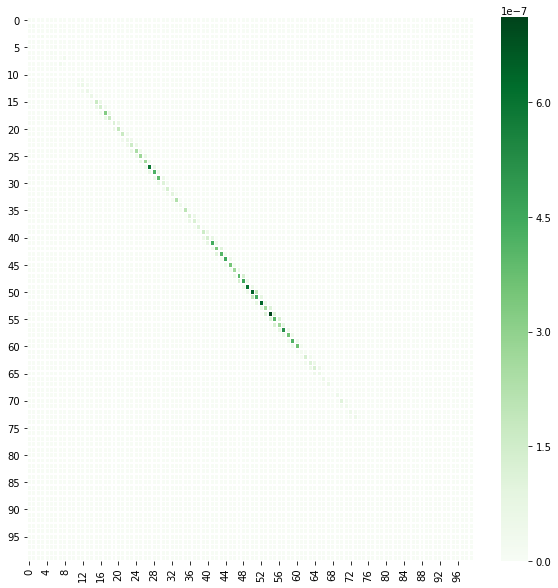

In [27]:
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(potential_i, linewidth=0.5, cmap="Greens")

plt.gcf().set_size_inches(10,10)

plt.show()

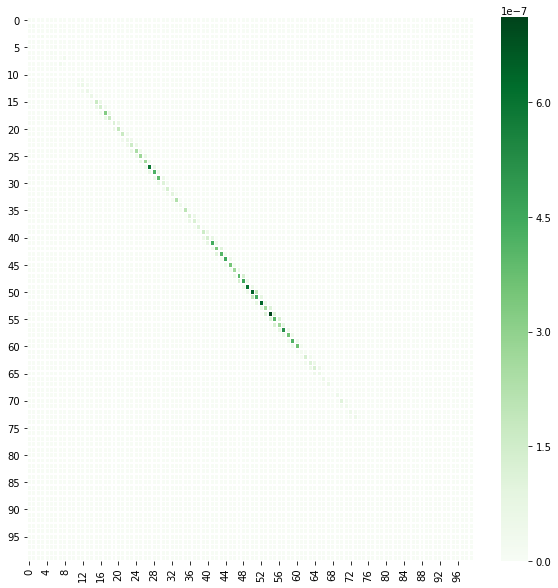

In [24]:
ax = sns.heatmap(potential , linewidth=0.5, cmap="Greens")

plt.gcf().set_size_inches(10,10)
plt.show()

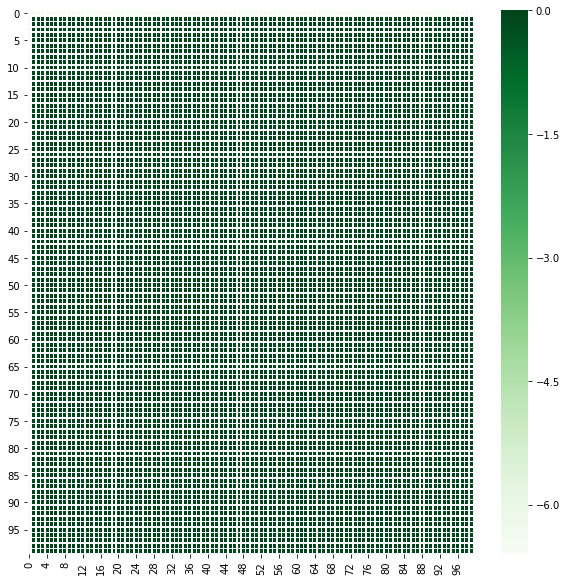

In [30]:
ax = sns.heatmap(potential_i - potential , linewidth=0.5, cmap="Greens")

plt.gcf().set_size_inches(10,10)
plt.show()